In [1]:
import pickle
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], ".."))
from modt.modt import MoDT
from modt._initialization import *
from modt.visualization import *
from modt.utility import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

## Common "Interpretable" DT

[Text(515.0769230769231, 237.82500000000002, 'X[1] <= 0.363\ngini = 0.757\nsamples = 2500\nvalue = [236, 264, 839, 661, 500]'),
 Text(274.7076923076923, 169.875, 'X[0] <= 0.328\ngini = 0.653\nsamples = 1420\nvalue = [37, 264, 647, 15, 457]'),
 Text(137.35384615384615, 101.92500000000001, 'X[1] <= 0.189\ngini = 0.224\nsamples = 468\nvalue = [0, 0, 60, 0, 408]'),
 Text(68.67692307692307, 33.974999999999994, 'gini = 0.282\nsamples = 53\nvalue = [0, 0, 44, 0, 9]'),
 Text(206.03076923076924, 33.974999999999994, 'gini = 0.074\nsamples = 415\nvalue = [0, 0, 16, 0, 399]'),
 Text(412.0615384615385, 101.92500000000001, 'X[1] <= 0.209\ngini = 0.538\nsamples = 952\nvalue = [37, 264, 587, 15, 49]'),
 Text(343.38461538461536, 33.974999999999994, 'gini = 0.074\nsamples = 420\nvalue = [0, 14, 404, 0, 2]'),
 Text(480.73846153846154, 33.974999999999994, 'gini = 0.647\nsamples = 532\nvalue = [37, 250, 183, 15, 47]'),
 Text(755.4461538461538, 169.875, 'X[0] <= 0.637\ngini = 0.575\nsamples = 1080\nvalue = 

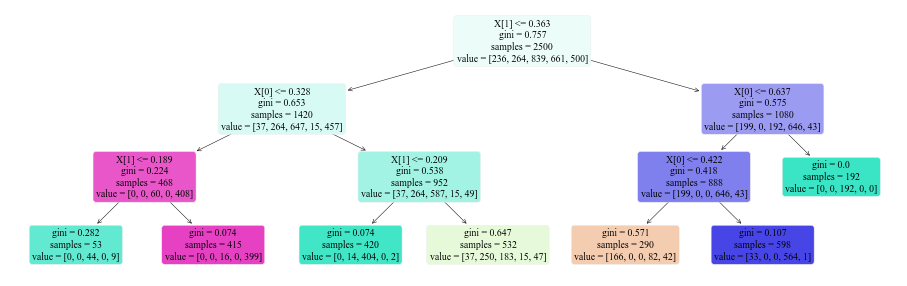

In [30]:
data_input = pickle.load(open("../datasets/generated7_input.np", "rb"))
data_target = pickle.load(open("../datasets/generated7_target.np", "rb"))
fig = plt.gcf()
fig.set_size_inches(16, 5)
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(data_input, data_target)
tree.plot_tree(clf, filled=True, rounded=True)

In [28]:
data_input = pickle.load(open("../datasets/generated7_input.np", "rb"))
data_target = pickle.load(open("../datasets/generated7_target.np", "rb"))
parameters = {
    "X": data_input,
    "y": data_target,
    "n_experts": 3,
    "iterations": 100,
    "max_depth": 1,
    "init_learning_rate": 60,
    "learning_rate_decay": 0.995,
    "initialization_method": Kmeans_init(),
    "feature_names": None,
    "class_names": None,
    "use_2_dim_gate_based_on": "feature_importance_lda",
    "use_2_dim_clustering": False,
    "black_box_algorithm": None,
    "save_likelihood": True,
    }

parameters_fit = {
    "optimization_method": "ridge_regression",
    "early_stopping": False,
    "use_posterior": False,
    }

modt = MoDT(**parameters)
modt.fit(**parameters_fit)

## Training of the gating function

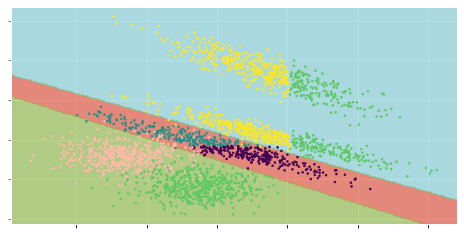

In [17]:
from celluloid import Camera # Codex needed on windows: https://ffmpeg.org/download.html
from IPython.display import HTML
fig = plt.figure(figsize=(8,4))

camera = Camera(fig)
for i in range(0,parameters["iterations"]): 
    plot_gating(modt,iteration=i,title=False,axis_digits=False,inverse_transform_standardization=False)
    #visualize_gating_animation(fig,modt.get_expert_iteration,modt.X,modt.y,i,low_alpha=False)
    camera.snap()
animation = camera.animate()

HTML(animation.to_html5_video())

## Final gating function

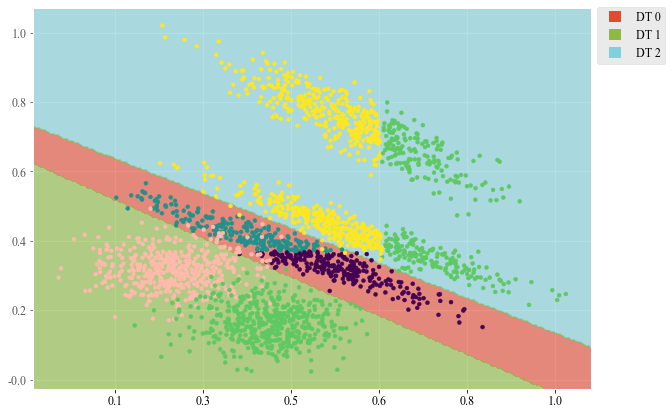

In [19]:
fig = plt.gcf()
fig.set_size_inches(10, 7)
plot_gating(modt,iteration=modt.best_iteration,title=False,point_size=15,axis_digits=True,inverse_transform_standardization=True,legend=True)

In [15]:
plot_dt_dtreeviz(modt,0,colors="visible")

In [22]:
plot_dt_dtreeviz(modt,1,colors="visible")

In [25]:
plot_dt_dtreeviz(modt,2,colors="visible")

Accuracy disjoint DTs: 0.96
Min:  0.7056 Max:  0.96


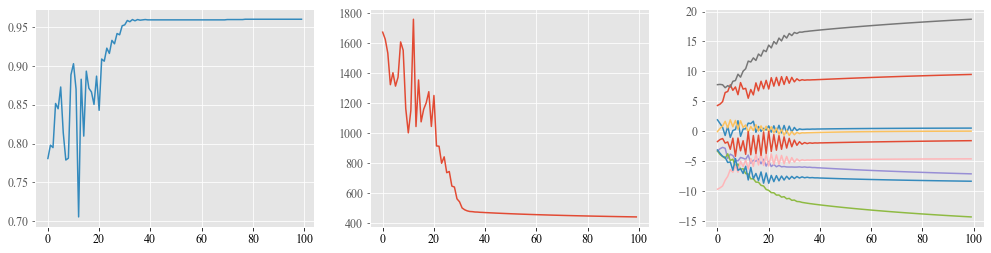

In [29]:
print("Accuracy disjoint DTs:", modt.score_internal_disjoint())
fig = plt.gcf()
fig.set_size_inches(17,4)
plot_training(modt)

In [21]:
for depth in [1,2,3,4]:
    print("Depth: {} accuracy: {}".format(depth, tree_accuracy(modt.X,modt.y,depth)))

Depth: 1 accuracy: 0.5172
Depth: 2 accuracy: 0.7332
Depth: 3 accuracy: 0.8076
Depth: 4 accuracy: 0.8868
